In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [3]:
dataDirectory = r"FER2013/train"

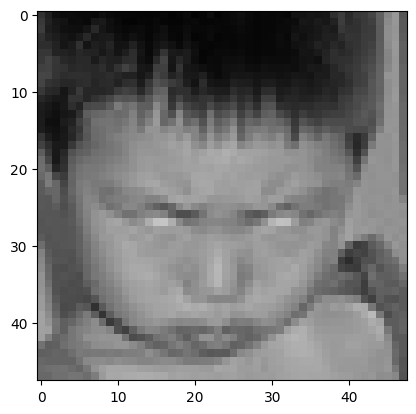

In [4]:
for category in classes:
    path = os.path.join(dataDirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img)) / 255.0
        plt.imshow(img_array)
        plt.show()
        break
    break

In [5]:
trainingData = []

def createTrainingData():
    for category in classes:
        path = os.path.join(dataDirectory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                normalize = img_array / 255.0
                trainingData.append([normalize, class_num])
            except Exception as e:
                pass

In [7]:
createTrainingData()

In [8]:
import random

random.shuffle(trainingData)

In [9]:
X = []
y = []

for features, label in trainingData:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, 48, 48, 3)

In [10]:
X.shape

(29115, 48, 48, 3)

In [11]:
Y = np.array(y)
Y.shape

(29115,)

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
from keras.applications.vgg19 import VGG19
model = VGG19(include_top=False, input_shape=(48, 48, 3))

In [14]:
from tensorflow.keras.utils import to_categorical

num_classes = 7
y_one_hot = to_categorical(y, num_classes)

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Add custom top
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=model.input, outputs=output)

model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    X, y_one_hot,
    epochs=5,  # You can change this
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 1191s 1s/step - accuracy: 0.3408 - loss: 1.6678
Epoch 2/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 1016s 1s/step - accuracy: 0.5243 - loss: 1.2535
Epoch 3/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 1011s 1s/step - accuracy: 0.5813 - loss: 1.1161
Epoch 4/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 1002s 1s/step - accuracy: 0.6281 - loss: 1.0186
Epoch 5/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 1014s 1s/step - accuracy: 0.6668 - loss: 0.9169
Epoch 6/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 998s 1s/step - accuracy: 0.7164 - loss: 0.7964
Epoch 7/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 1001s 1s/step - accuracy: 0.7525 - loss: 0.7042
Epoch 8/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 998s 1s/step - accuracy: 0.7949 - loss: 0.5868
Epoch 9/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 1007s 1s/step - accuracy: 0.8375 - loss: 0.4767
Epoch 10/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 1001s 1s/step - accuracy: 0.8776 - loss: 0.3763
Epoch 11/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 1001s 1s/step - accuracy: 0.8981 - loss: 0.3067
Epoch 12/100
898/898 

In [32]:
loss, accuracy = model.evaluate(X, y_one_hot)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

992/992 ━━━━━━━━━━━━━━━━━━━━ 823s 830ms/step - accuracy: 0.9922 - loss: 0.0226
Test Accuracy: 99.17%
Test Loss: 0.0246


In [16]:
testDataDirectory = r"FER2013/test"
testingData = []

def createTestingData():
    for category in classes:
        path = os.path.join(testDataDirectory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                normalize = img_array / 255.0
                testingData.append([normalize, class_num])
            except Exception as e:
                pass

In [17]:
createTestingData()

In [18]:
len(testingData)

7178

In [19]:
import random

random.shuffle(testingData)

In [20]:
X_test = []
y_test = []

for features, label in testingData:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, 48, 48, 3)

In [21]:
X_test.shape

(7178, 48, 48, 3)

In [22]:
len(y_test)

7178

In [23]:
from tensorflow.keras.utils import to_categorical

num_classes = 7
y_test_one_hot = to_categorical(y_test, num_classes)

In [26]:
history = model.fit(
    X, y_one_hot,
    epochs=5,
    validation_data = (X_test, y_test_one_hot),  # You can change this
    batch_size=32
)

Epoch 1/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 3243s 4s/step - accuracy: 0.2901 - loss: 1.7342 - val_accuracy: 0.5095 - val_loss: 1.3075
Epoch 2/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 3070s 3s/step - accuracy: 0.5049 - loss: 1.2920 - val_accuracy: 0.5610 - val_loss: 1.1601
Epoch 3/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1376s 2s/step - accuracy: 0.5723 - loss: 1.1521 - val_accuracy: 0.5789 - val_loss: 1.1163
Epoch 4/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1245s 1s/step - accuracy: 0.6246 - loss: 1.0357 - val_accuracy: 0.6035 - val_loss: 1.0625
Epoch 5/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 916s 1s/step - accuracy: 0.6725 - loss: 0.9116 - val_accuracy: 0.6215 - val_loss: 1.0242


In [26]:
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

338/338 ━━━━━━━━━━━━━━━━━━━━ 172s 508ms/step - accuracy: 0.6660 - loss: 2.4630
Test Accuracy: 66.45%
Test Loss: 2.4497


In [51]:
model.save("ferVGG19.h5")

In [75]:
type(y_test_one_hot)

numpy.ndarray

In [76]:
print(y_test_one_hot.shape)
print(np.unique(np.argmax(y_test_one_hot, axis=1))) 

(7178, 7)
[0 1 2 3 4 5 6]


In [78]:
print(X.shape, y_one_hot.shape)             # Should be (train_samples, 48, 48, 1), (train_samples, 7)
print(X_test.shape, y_test_one_hot.shape)   # Should be (test_samples, 48, 48, 1), (test_samples, 7)

(28709, 48, 48, 3) (28709, 7)
(7178, 48, 48, 3) (7178, 7)


In [ ]:
model = tf.keras.models.load_model('ferVGG19.h5')

In [33]:
from tensorflow.keras.preprocessing.image import load_img

def ef(image):
    img = load_img(image)
    feature = np.array(img)
    feature = np.expand_dims(feature, axis=0)
    return feature/255.0

In [34]:
image = r'FER2013\train\angry\Training_178362.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = classes[pred.argmax()]
print("model prediction is ",pred_label)

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
model prediction is  angry


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

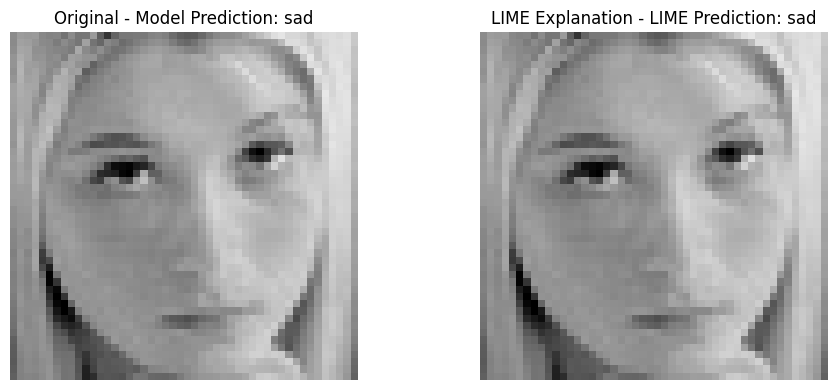

In [37]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries
from keras.applications.imagenet_utils import decode_predictions

def explain_prediction(image_path, model, classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']):
    # Step 1: Load the image as RGB
    img = load_img(image_path, target_size=(48, 48), color_mode='rgb')  # Load as RGB
    img_array = img_to_array(img).astype(np.uint8)                      # Shape: (48, 48, 3)
    
    # Step 2: Preprocess image
    img_input = img_array / 255.0
    img_input = np.expand_dims(img_input, axis=0)                       # Shape: (1, 48, 48, 3)

    # Step 3: Predict with model
    model_pred = model.predict(img_input)
    predicted_label = classes[np.argmax(model_pred)]

    # Step 4: LIME setup
    explainer = lime_image.LimeImageExplainer()

    def predict_fn(images):
        images = images / 255.0
        return model.predict(images)

    explanation = explainer.explain_instance(
        image=img_array,
        classifier_fn=predict_fn,
        top_labels=1,
        hide_color=0,
        num_samples=1000
    )

    lime_predicted_label = explanation.top_labels[0]
    lime_image_, mask = explanation.get_image_and_mask(
        lime_predicted_label,
        positive_only=True,
        num_features=5,
        hide_rest=False
    )

    # Step 5: Plot original and explanation
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].imshow(img_array.astype(np.uint8))
    ax[0].set_title(f"Original - Model Prediction: {predicted_label}")
    ax[0].axis('off')

    ax[1].imshow(mark_boundaries(lime_image_, mask))
    ax[1].set_title(f"LIME Explanation - LIME Prediction: {classes[lime_predicted_label]}")
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

explain_prediction(r'FER2013\test\sad\PrivateTest_2892457.jpg', model)

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score
predicted_probs = model.predict(X_test)
predicted_classes = np.argmax(predicted_probs, axis=1)
true_labels = y_test_one_hot
true_labels = np.argmax(true_labels, axis=1) 
precision = precision_score(true_labels, predicted_classes, average='weighted')
recall = recall_score(true_labels, predicted_classes, average='weighted')
f1 = f1_score(true_labels, predicted_classes, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

338/338 ━━━━━━━━━━━━━━━━━━━━ 124s 367ms/step
Precision: 0.6809375922499885
Recall: 0.664477335800185
F1-Score: 0.6699376375504369


In [27]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_multiclass_roc(y_true, y_pred_probs, class_names):
    """
    y_true: shape (n_samples,) with class indices (0, 1, ..., n_classes-1)
    y_pred_probs: shape (n_samples, n_classes) softmax outputs
    class_names: list of class labels
    """
    y_true_bin = label_binarize(y_true, classes=range(len(class_names)))
    
    plt.figure(figsize=(8, 6))
    for i in range(len(class_names)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.2f})")
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('Multiclass ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


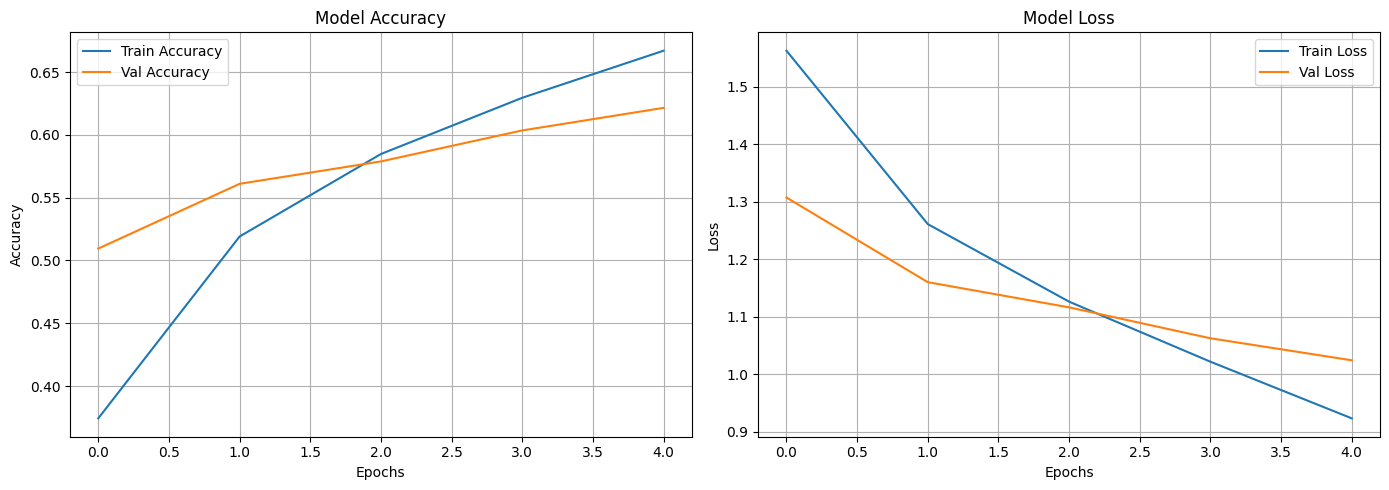

225/225 ━━━━━━━━━━━━━━━━━━━━ 98s 434ms/step


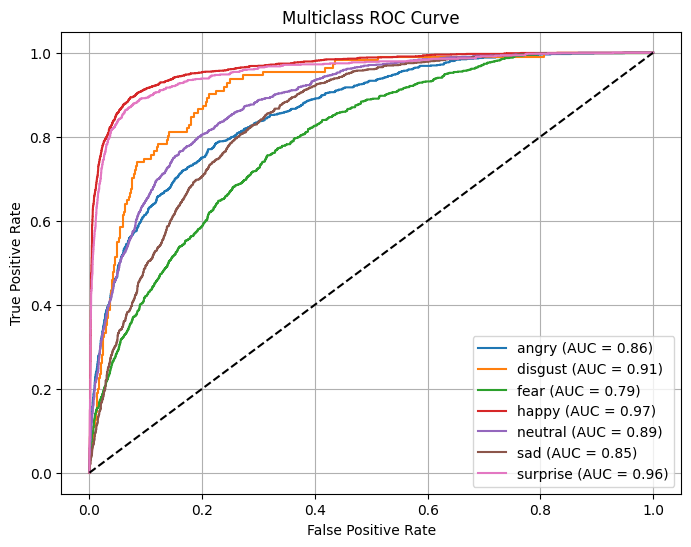

In [28]:
# Plot history
plot_training_history(history)

# Predict probabilities on test data
y_pred_probs = model.predict(X_test)  # shape: (n_samples, n_classes)

# True labels: e.g., y_test = [0, 2, 1, ...]
plot_multiclass_roc(y_test, y_pred_probs, class_names=['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])

In [36]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,157,513 (76.89 MB)

 Trainable params: 20,157,511 (76.89 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)